INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.108:39453
INFO:DRV:      Host server up..............Done 0.25s
INFO:DRV:      Encoding axons/synapses.....Done 7.83ms
INFO:DRV:      Compiling Embedded snips....Done 0.32s
INFO:DRV:      Compiling MPDS Registers....Done 0.84ms
INFO:HST:  Args chip=0 cpu=0 /homes/mathis.richter/.venv/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1605201691.5328007/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=0 
INFO:DRV:      Booting up..................Done 2.19s
INFO:DRV:      Encoding probes.............Done 3.24ms
INFO:DRV:      Transferring probes.........Done 4.19ms
INFO:DRV:      Configuring registers.......Done 4.99ms
INFO:DRV:      Transferring spikes.........Done 2.73ms
INFO:DRV:      Executing...................Done 0.01s
INFO:HST:  Lakemont_driver...
INFO:DRV:      Processing timeseries.......Done 0.03s
INFO:DRV:  Executor: 30 timesteps..........Done 2.85s
INFO:HST:  

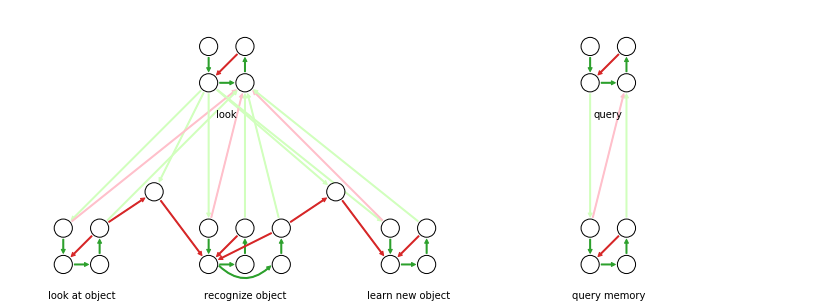

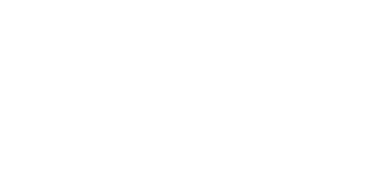

In [11]:
import os
import sys
sys.path.append("/homes/mathis.richter/dft_loihi")
sys.path.append("/homes/mathis.richter/nxsdk-0.9.9")

import nxsdk.api.n2a as nx


from dft.state_machine import StateMachine
from dft.state_machine import create_simulated_input
from dft.state_machine import create_visualization

TIMESTEPS = 30

net = nx.NxNet()

state_machine = StateMachine(net)

out_groups, simulated_inputs = create_simulated_input(net, TIMESTEPS)
state_machine.connect_in(out_groups)

net.run(TIMESTEPS)
net.disconnect()

create_visualization(state_machine.behaviors, state_machine.behavior_dictionary, TIMESTEPS)

#for input in simulated_inputs:
#    input.plot()

#for behavior in state_machine.behaviors:
#    behavior.plot()